# 数据预处理

## 1. 导入函数

In [1]:
# 导入所需的函数
import os
import sys

# 获取当前 Notebook 的路径
notebook_path = os.getcwd()

print("当前 Notebook 的路径：", notebook_path)

# 获取项目根目录的路径
project_root = os.path.abspath(os.path.join(notebook_path, ".."))

# 切换当前工作目录到项目根目录
# 判断当前工作目录的后缀是否为"Pattern-Recognition"
if not notebook_path.endswith("Pattern-Recognition"):
    os.chdir(project_root)

# 将项目根目录添加到 Python 模块搜索路径
if project_root not in sys.path:
    sys.path.append(project_root)

print("当前工作目录：", os.getcwd())
print("当前的 Python 路径：")
print(sys.path)


from src.data_preprocessing import generate_synthetic_data, preprocess_data

当前 Notebook 的路径： d:\pycharm_workplace\Pattern-Recognition\notebooks
当前工作目录： d:\pycharm_workplace\Pattern-Recognition
当前的 Python 路径：
['d:\\Anaconda3\\python312.zip', 'd:\\Anaconda3\\DLLs', 'd:\\Anaconda3\\Lib', 'd:\\Anaconda3', '', 'd:\\Anaconda3\\Lib\\site-packages', 'd:\\Anaconda3\\Lib\\site-packages\\win32', 'd:\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'd:\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'd:\\Anaconda3\\Lib\\site-packages\\setuptools\\_vendor', 'd:\\pycharm_workplace\\Pattern-Recognition']


## 2. 生成和预处理数据

In [4]:
df_raw = generate_synthetic_data()

df_processed, top_contents = preprocess_data(df_raw)

# Step 4: 数据验证
print("\n原始数据前几行：")
print(df_raw.head())

print("\n预处理后的数据前几行：")
print(df_processed.head())

print("top_contents:", top_contents)

合成数据已保存到 D:\pycharm_workplace\Pattern-Recognition\data\raw
预处理后的数据已保存到 D:\pycharm_workplace\Pattern-Recognition\data\processed
高频内容已保存到 D:\pycharm_workplace\Pattern-Recognition\data\processed\high_freq_contents\high_freq_contents.csv

原始数据前几行：
   timestamp  content_id  request_count
0 2024-12-01           1            140
1 2024-12-01           2             76
2 2024-12-01           3             41
3 2024-12-01           4             29
4 2024-12-01           5             32

预处理后的数据前几行：
     timestamp  content_id  request_count
0   2024-12-01           1            140
341 2024-12-01         342              1
340 2024-12-01         341              1
339 2024-12-01         340              0
338 2024-12-01         339              1
top_contents:     content_id  total_requests
0            1           423.0
1            2           237.0
2            3           162.0
3            4           114.0
4            5            88.0
5            6            70.0
6            8      

## 3. 验证数据生成和预处理

时间戳格式：
datetime64[ns]

df_processed的信息：
<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 0 to 11999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      12000 non-null  datetime64[ns]
 1   content_id     12000 non-null  int32         
 2   request_count  12000 non-null  int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 281.2 KB
None

筛选后的数据前5行：
   timestamp  content_id  request_count
0 2024-12-01           1            140
4 2024-12-01           5             32
3 2024-12-01           4             29
2 2024-12-01           3             41
1 2024-12-01           2             76


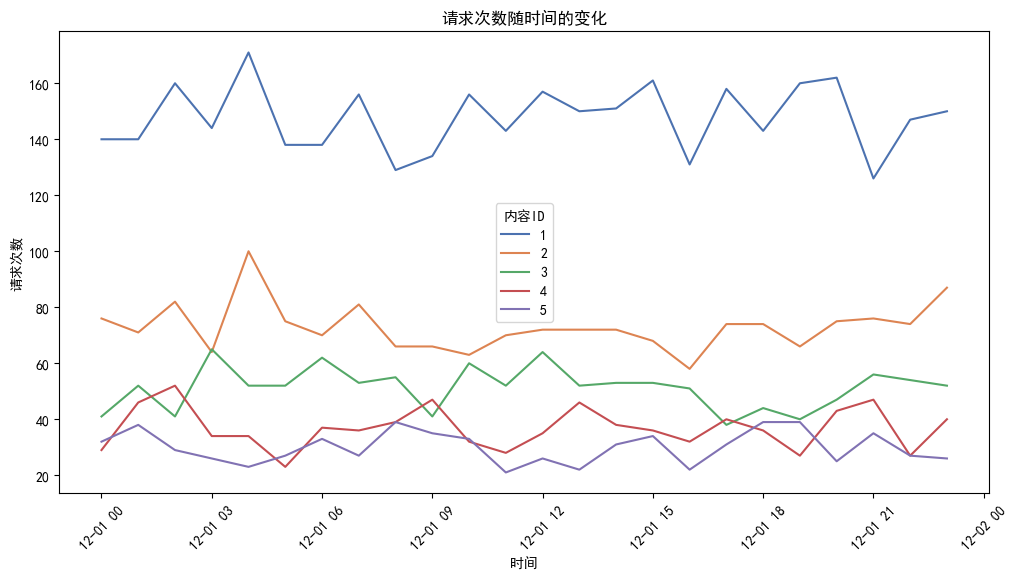

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 设置全局中文字体
matplotlib.rcParams["font.sans-serif"] = ["SimHei"] 
matplotlib.rcParams["axes.unicode_minus"] = False

# 显示时间戳格式
print("时间戳格式：")
print(df_processed["timestamp"].dtype)

# 显示df_processed的信息
print("\ndf_processed的信息：")
print(df_processed.info())

# 可视化最热门内容的请求次数随时间的变化
sample_df = df_processed[df_processed["content_id"].isin(top_contents["content_id"].head(5))]

print("\n筛选后的数据前5行：") 
print(sample_df.head())

plt.figure(figsize=(12, 6))  
sns.lineplot(data=sample_df, x="timestamp", y="request_count", hue="content_id", palette="deep")
plt.title("请求次数随时间的变化")
plt.xlabel("时间")
plt.ylabel("请求次数")
plt.legend(title="内容ID")
plt.xticks(rotation=45)
plt.show()